In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import linear_model

In [2]:
epsilon=np.random.randn(10000)
epsilon

array([ 0.06362321,  1.45752295, -0.50306814, ..., -1.87581089,
       -1.90828847, -1.42846273])

In [3]:
ds=np.random.uniform(0,1,10000)
ds

array([0.63917969, 0.56103489, 0.82693914, ..., 0.60448551, 0.59357409,
       0.6806665 ])

In [4]:
lng=0.02+(0.02*epsilon)
g=np.exp(lng)
g

array([1.02150034, 1.05037838, 1.00998819, ..., 0.9826363 , 0.98199823,
       0.99146736])

In [5]:
upper=1.1
lower=1.0
x0=0.5*(upper+lower)
rf=1.0303
b0=np.arange(0,10.1,0.1)

In [6]:
def v(x):
    v_list=[]
    for i in g:
        if x*i>=1.0303:
            y=(x*i)-1.0303
        else:
            y=2*(x*i-1.0303)
        v_list.append(y)
    return v_list     

In [7]:
def error(x,b):
    error_term=0.99*b*np.mean(v(x))+0.99*x-1
    return error_term

In [8]:
error(1.05,2)

0.11996850889595545

In [9]:
x_list=[]
for b in b0:
    upper=1.1
    lower=1.0
    error_term=error(0.5*(upper+lower),b)
    while abs(error_term) > 1e-5: 
        if error_term>0:
            upper=0.5*(upper+lower)
            error_term=error(0.5*(upper+lower),b)
        else:
            lower=0.5*(upper+lower)
            error_term=error(0.5*(upper+lower),b)
    x_list.append(0.5*(upper+lower))

In [10]:
array_xlist = np.array(x_list)

In [11]:
PD_ratio = 1/(array_xlist-1)
PD_ratio

array([98.93719807, 92.66968326, 88.27586207, 85.0674974 , 82.66397578,
       80.70935961, 79.14975845, 77.87072243, 76.7760075 , 75.88698472,
       75.08707608, 74.40508629, 73.8018018 , 73.27370304, 72.7854287 ,
       72.33554084, 71.95432587, 71.60839161, 71.28127039, 70.98786828,
       70.71212775, 70.4688172 , 70.22717531, 70.01709402, 69.82314085,
       69.63025924, 69.45315812, 69.30626058, 69.14538932, 68.99978943,
       68.8692728 , 68.739249  , 68.60971524, 68.49498328, 68.39490712,
       68.29512297, 68.19562955, 68.0964256 , 68.01162308, 67.92703151,
       67.8426501 , 67.75847808, 67.68849411, 67.61865456, 67.54895898,
       67.48635568, 67.42386831, 67.36149656, 67.29924009, 67.24399754,
       67.1888456 , 67.14066182, 67.09254709, 67.04450128, 66.99652423,
       66.95545566, 66.90760592, 66.86664626, 66.82573672, 66.7848772 ,
       66.74406762, 66.71009772, 66.66937945, 66.63548551, 66.60162602,
       66.56780091, 66.53401015, 66.50700223, 66.47327315, 66.44

Text(0.5, 1.0, 'Price dividend ratio VS Scale factor b0')

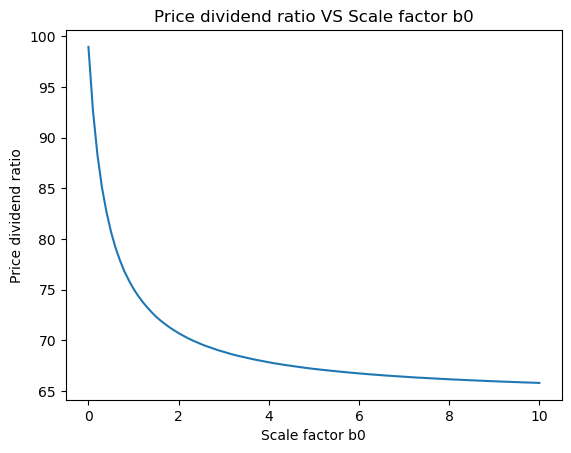

In [12]:
plt.plot(b0, PD_ratio)
plt.xlabel('Scale factor b0')
plt.ylabel('Price dividend ratio')
plt.title('Price dividend ratio VS Scale factor b0')

In [13]:
E_Rm = array_xlist * np.exp(0.0202)
E_Rm

array([1.03071907, 1.03141661, 1.03196468, 1.03240064, 1.03274942,
       1.03304836, 1.03329749, 1.03350924, 1.03369608, 1.03385178,
       1.03399503, 1.03411959, 1.03423169, 1.03433134, 1.03442476,
       1.03451196, 1.03458669, 1.0346552 , 1.0347206 , 1.03477976,
       1.03483582, 1.03488564, 1.03493547, 1.03497906, 1.03501954,
       1.03506003, 1.03509739, 1.03512854, 1.03516279, 1.03519393,
       1.03522196, 1.03524998, 1.03527801, 1.03530292, 1.03532472,
       1.03534652, 1.03536832, 1.03539011, 1.0354088 , 1.03542748,
       1.03544617, 1.03546485, 1.03548042, 1.03549599, 1.03551156,
       1.03552557, 1.03553959, 1.0355536 , 1.03556761, 1.03558007,
       1.03559253, 1.03560342, 1.03561432, 1.03562522, 1.03563612,
       1.03564546, 1.03565636, 1.03566571, 1.03567505, 1.03568439,
       1.03569373, 1.03570152, 1.03571086, 1.03571864, 1.03572643,
       1.03573421, 1.035742  , 1.03574823, 1.03575601, 1.03576224,
       1.03576847, 1.03577625, 1.03578248, 1.03578871, 1.03579

Text(0.5, 1.0, 'Equity permium VS Scale factor b0')

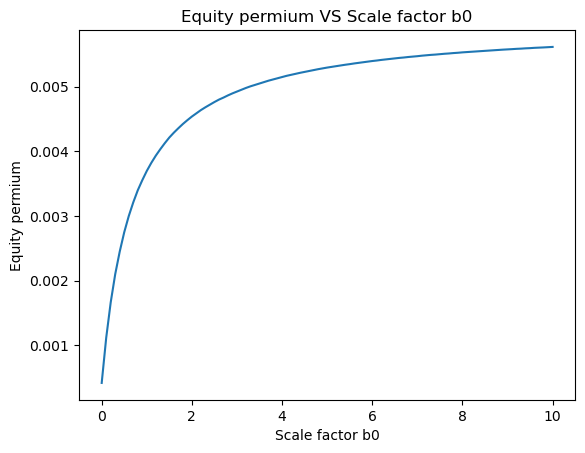

In [14]:
plt.plot(b0, E_Rm-rf)
plt.xlabel('Scale factor b0')
plt.ylabel('Equity permium')
plt.title('Equity permium VS Scale factor b0')